<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

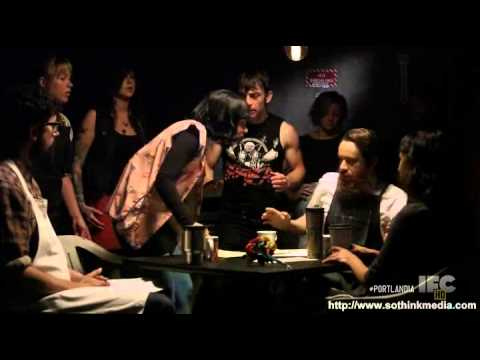

In [115]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [116]:
%pwd

'C:\\Users\\Todd'

In [117]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [134]:
# Start here

# Import Required Libraries
import pandas as pd
from collections import Counter

# Plotting 
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [119]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [120]:
# The date needs to be removed or put in its own column
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))

In [121]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0 star rating
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0 star rating
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0 star rating
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0 star rating
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0 star rating


In [122]:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,I actually step into this restaurant by chan...,4.0 star rating
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do the...",5.0 star rating
7613,The Steeping Room,"Loved coming here for tea, and the atmospher...",4.0 star rating
7614,The Steeping Room,The food is just average. The booths didn't ...,3.0 star rating
7615,The Steeping Room,I finally stopped in for lunch with my colle...,4.0 star rating


In [123]:
# The 1's at the front of the text needs to be removed
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))

In [124]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0 star rating
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0 star rating
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0 star rating


In [125]:
# make it lowercase
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

In [126]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5.0 star rating
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0 star rating
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0 star rating
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2.0 star rating
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0 star rating


In [127]:
# convert star rating to an integer
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

In [128]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [129]:
# Overall Word/Token Count
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [ ]:
nlp.Defaults.stop_words

In [131]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'come', 'definitely', 'order'])

In [136]:
# Tokenizer pipe removing stop words, blank words, and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)
    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere!, corner, shop, ...
1    [list, date, night:, austin,, ambiance, austin...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor!, good, drink, nice, seat, howeve...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [137]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [138]:
# Create a word count dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
147,good,2508,3516,1.0,0.009654,0.009654,0.329307
106,great,2453,3267,2.0,0.008971,0.018625,0.322085
172,like,2170,3150,3.0,0.008649,0.027275,0.284926
249,it's,2059,3115,4.0,0.008553,0.035828,0.270352
1,love,1745,2235,5.0,0.006137,0.041965,0.229123


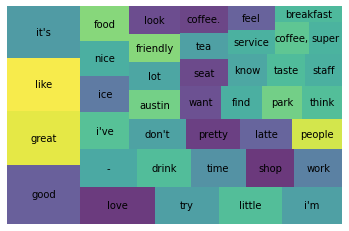

In [139]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [140]:
# Check top words for 4 and 5 ratings
shops_w4 = shops[shops['star_rating'] >= 4]
good_count = count(shops_w4['tokens'])
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
106,great,2185,2917,1.0,0.010289,0.010289,0.355863
185,good,1999,2788,2.0,0.009834,0.020124,0.325570
220,it's,1645,2498,3.0,0.008811,0.028935,0.267915
219,like,1595,2258,4.0,0.007965,0.036900,0.259772
1,love,1543,1991,5.0,0.007023,0.043923,0.251303
135,try,1238,1548,6.0,0.005460,0.049383,0.201629
210,little,1231,1512,7.0,0.005333,0.054717,0.200489
137,-,727,1431,8.0,0.005048,0.059765,0.118404
268,i'm,1077,1375,9.0,0.004850,0.064615,0.175407
34,drink,975,1254,10.0,0.004423,0.069038,0.158795


In [141]:
# Check top words for 1-3 ratings
shops_w3 = shops[shops['star_rating'] <= 4]
bad_count = count(shops_w3['tokens'])
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
115,good,1414,2034,1.0,0.010018,0.010018,0.368613
140,like,1321,1957,2.0,0.009639,0.019657,0.344369
218,it's,1106,1689,3.0,0.008319,0.027976,0.288321
74,great,1055,1390,4.0,0.006846,0.034822,0.275026
209,little,890,1140,5.0,0.005615,0.040437,0.232013
103,try,868,1091,6.0,0.005374,0.045810,0.226277
105,-,531,1061,7.0,0.005226,0.051036,0.138425
267,i'm,769,1022,8.0,0.005034,0.056070,0.200469
43,drink,717,1005,9.0,0.004950,0.061020,0.186913
576,time,724,963,10.0,0.004743,0.065763,0.188738


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences

In [142]:
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct

good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
106,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026
185,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613
220,it's,1645,2498,3.0,0.008811,0.028935,0.267915,0.288321
219,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369
1,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050
135,try,1238,1548,6.0,0.005460,0.049383,0.201629,0.226277
210,little,1231,1512,7.0,0.005333,0.054717,0.200489,0.232013
137,-,727,1431,8.0,0.005048,0.059765,0.118404,0.138425
268,i'm,1077,1375,9.0,0.004850,0.064615,0.175407,0.200469
34,drink,975,1254,10.0,0.004423,0.069038,0.158795,0.186913


In [143]:
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
106,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026,0.080837
185,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613,-0.043043
220,it's,1645,2498,3.0,0.008811,0.028935,0.267915,0.288321,-0.020406
219,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369,-0.084597
1,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050,0.073253
135,try,1238,1548,6.0,0.005460,0.049383,0.201629,0.226277,-0.024649
210,little,1231,1512,7.0,0.005333,0.054717,0.200489,0.232013,-0.031524
137,-,727,1431,8.0,0.005048,0.059765,0.118404,0.138425,-0.020022
268,i'm,1077,1375,9.0,0.004850,0.064615,0.175407,0.200469,-0.025062
34,drink,975,1254,10.0,0.004423,0.069038,0.158795,0.186913,-0.028119


In [144]:
# The top 10 words for good shops
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
106,great,2185,2917,1.0,0.010289,0.010289,0.355863,0.275026,0.080837
1,love,1543,1991,5.0,0.007023,0.043923,0.251303,0.178050,0.073253
148,friendly,1006,1036,18.0,0.003654,0.101779,0.163844,0.116788,0.047055
754,delicious,629,664,42.0,0.002342,0.171519,0.102443,0.059176,0.043267
378,favorite,576,663,43.0,0.002339,0.173858,0.093811,0.052920,0.040891
775,amaze,387,419,100.0,0.001478,0.276713,0.063029,0.028415,0.034614
217,perfect,505,556,60.0,0.001961,0.209982,0.082248,0.054745,0.027503
594,awesome,345,388,111.0,0.001369,0.292085,0.056189,0.029718,0.026470
213,super,669,765,35.0,0.002698,0.154291,0.108958,0.084463,0.024495
635,austin.,473,502,71.0,0.001771,0.230148,0.077036,0.055266,0.021770


In [145]:
# The top 10 words for bad shops
good_count.sort_values(by=['appears_in_diff'])[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
219,like,1595,2258,4.0,0.007965,0.036900,0.259772,0.344369,-0.084597
23,pretty,791,993,21.0,0.003503,0.112453,0.128827,0.188999,-0.060172
256,don't,793,965,22.0,0.003404,0.115857,0.129153,0.184567,-0.055414
215,didn't,423,482,77.0,0.001700,0.240458,0.068893,0.115485,-0.046592
185,good,1999,2788,2.0,0.009834,0.020124,0.325570,0.368613,-0.043043
120,wasn't,257,296,148.0,0.001044,0.334943,0.041857,0.084463,-0.042606
201,think,630,767,34.0,0.002706,0.151593,0.102606,0.144943,-0.042337
132,maybe,175,194,237.0,0.000684,0.407911,0.028502,0.067258,-0.038756
1252,ask,289,318,134.0,0.001122,0.319786,0.047068,0.085766,-0.038698
81,bite,529,605,51.0,0.002134,0.191569,0.086156,0.120959,-0.034803


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 